In [3]:
import tensorflow as tf

In [4]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

# SGD

- SGD (short for Stochastic Gradient Descent) is a widely used optimization algorithm in machine learning, particularly for training deep neural networks. 
- It is a type of gradient descent optimization algorithm that updates the weights of the neural network by iteratively computing the gradients of the loss function with respect to the weights and then adjusting the weights in the direction that minimizes the loss.


- In TensorFlow, SGD can be implemented using the 
        tf.keras.optimizers.SGD() class.
        
- This class takes several hyperparameters that control how the optimization algorithm behaves, including:

- learning_rate: The learning rate controls the step size taken in the direction of the negative gradient. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.

- momentum: The momentum hyperparameter controls how much the optimization algorithm relies on previous weight updates when updating the current weights. A higher momentum can help prevent the optimization from getting stuck in local minima, but it can also cause overshooting.

- nesterov: A boolean value indicating whether or not to use Nesterov momentum. Nesterov momentum is a modification of standard momentum that reduces the oscillations that can occur when the momentum term is high.

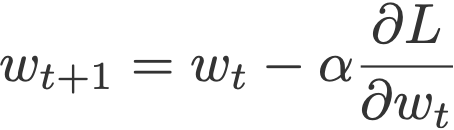

- Here's an example of how you might use the tf.keras.optimizers.SGD() class in TensorFlow:

In [5]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, 
                                    momentum=0.9, 
                                    nesterov=True)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# AdaGrad — Adaptive Gradient Algorithm

- Decay the learning rate for parameters in proportion to their update history (more updates means more decay).

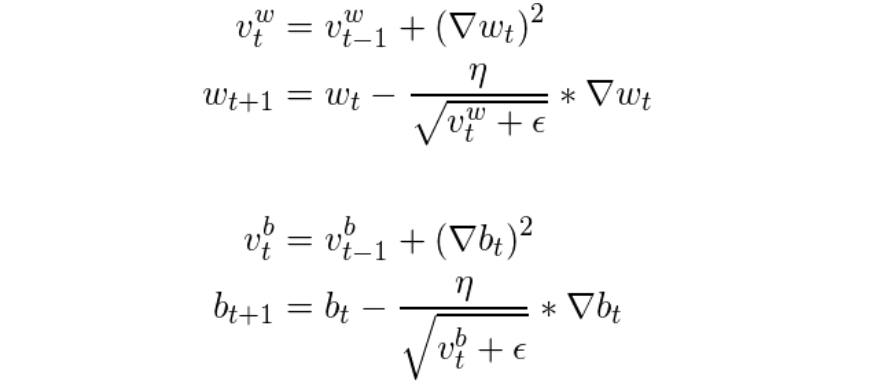

In [12]:
def adagrad():
    w, b, eta = init_w, init_b, 0.1
    v_w, v_b, eps = 0, 0, 1e-8
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
            
        v_w = v_w + dw**2
        v_b = v_b + db**2
        
        w = w - (eta/np.sqrt(v_w + eps)) * dw
        b = b - (eta/np.sqrt(v_b + eps)) * db

**Which option is true about Optimizers which have adaptive learning rates while training?**


1. The training should start from larger learning rate
2. **The training should start from smaller learning rate**
3. When we start with larger learning rate, at some point the value of the loss function starts decreasing in the first few iterations
4. When we start with smaller learning rate, the loss doesn’t improve and probably even grows while we run the first few iterations


- The training should start from a relatively large learning rate because, in the beginning, random weights are far from optimal, and then the learning rate can decrease during training to allow more fine-grained weight updates.
- The two other statements about learning rates are incorrect, the correct statements are: When we start with a smaller learning rate, at some point the value of the loss function starts decreasing in the first few iterations.
- When we start with a larger learning rate, the loss doesn’t improve and probably even grows while we run the first few iterations.

# RMSprop : 

- MSprop (short for Root Mean Square Propagation) is an optimization algorithm used in machine learning to improve the performance of deep neural networks by adapting the learning rate for each weight in the network.
- It is a popular optimization algorithm used for gradient descent in neural networks.




    - In Tensor Flow, RMSprop can be implemented using the tf.keras.optimizers.RMSprop() class. 
    
    

- When using this class, you can specify various hyperparameters to control how the optimization algorithm behaves. 



- **The most important of these hyperparameters are:**

    - learning_rate: The learning rate controls how quickly the optimization algorithm adapts the weights. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.

    - decay: The decay hyperparameter controls the rate at which the learning rate decreases over time. This helps prevent the algorithm from getting stuck in local minima or overshooting the optimal solution.

    - momentum: The momentum hyperparameter controls how much the optimization algorithm relies on previous weight updates when updating the current weights. A higher momentum can help prevent the optimization from getting stuck in local minima, but it can also cause overshooting.

    - epsilon: A small value added to the denominator for numerical stability.

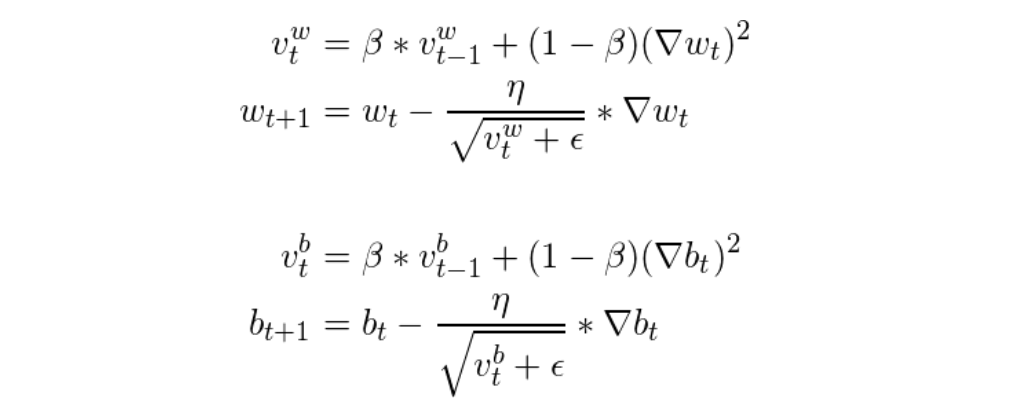


- Here's an example of how you might use the tf.keras.optimizers.RMSprop() class in Tensor Flow:

In [11]:
def rmsprop():
    w, b, eta = init_w, init_b, 0.1
    v_w, v_b, beta, eps = 0, 0, 0.9, 1e-8
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X,Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)

        v_w = beta * v_w + (1 - beta) * dw**2
        v_b = beta * v_b + (1 - beta) * db**2

        w = w - (eta/np.sqrt(v_w + eps)) * dw
        b = b - (eta/np.sqrt(v_b + eps)) * db

In [6]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,                                        
                                        momentum=0.6,
                                       epsilon=1e-07)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Adam

- Adam (Adaptive Moment Estimation) is a popular optimization algorithm in machine learning that combines the benefits of both SGD and RMSprop algorithms. 
- It was first introduced by Kingma and Ba in 2014. 
- The Adam algorithm adapts the learning rate of each parameter based on the gradient's moving average and the variance of the moving average. This makes it well suited for training deep neural networks, as it can handle non-stationary objective functions and noisy gradients.



- In TensorFlow, Adam can be implemented using the tf.keras.optimizers.Adam() class. This class takes several hyperparameters that control how the optimization algorithm behaves, including:
- learning_rate: The learning rate controls the step size taken in the direction of the negative gradient. A higher learning rate may cause the optimization to converge more quickly, but it can also cause instability and overshooting. A lower learning rate may take longer to converge, but it can also provide more stable results.
- beta_1: The decay rate for the first moment estimate. This controls how much weight is given to previous gradient values when computing the moving average. A value close to 1.0 will give more weight to previous gradients, while a value closer to 0.0 will give less weight.
- beta_2: The decay rate for the second moment estimate. This controls how much weight is given to previous squared gradient values when computing the moving average. A value close to 1.0 will give more weight to previous squared gradients, while a value closer to 0.0 will give less weight.
- epsilon: A small value added to the denominator to avoid division by zero.


Here's an example of how you might use the tf.keras.optimizers.Adam() class in TensorFlow:

In [14]:
import tensorflow as tf

# Define a neural network model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on mini-batches of training data
# model.fit(x_train, y_train, batch_size=32, epochs=10)


        m_t = beta_1 * m_t-1 + (1 - beta_1) * g_t
        v_t = beta_2 * v_t-1 + (1 - beta_2) * g_t^2
        m_hat_t = m_t / (1 - beta_1^t)
        v_hat_t = v_t / (1 - beta_2^t)
        w_t = w_t-1 - learning_rate * m_hat_t / (sqrt(v_hat_t) + epsilon)



    where g_t is the gradient of the loss function with respect to the weights at time t, m_t and v_t are the first and second moment estimates of the gradient at time t, m_hat_t and v_hat_t are the bias-corrected estimates of m_t and v_t, beta_1 and `beta

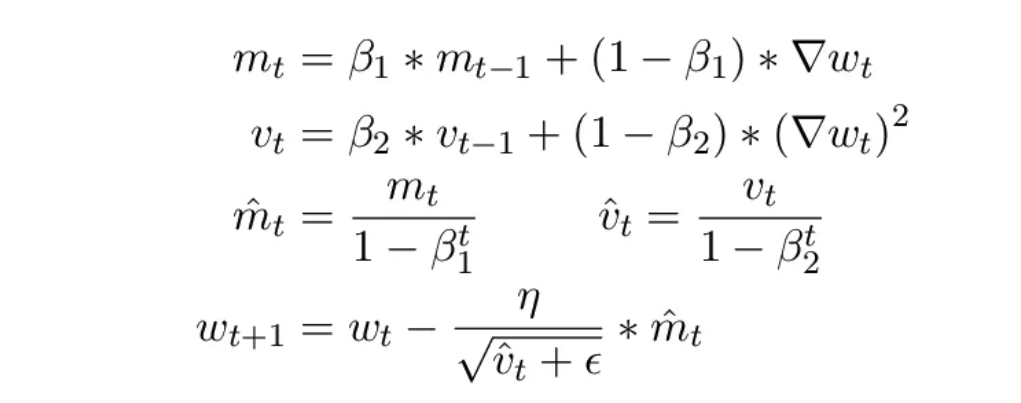

In [10]:
def adam():
	w, b, eta, max_epochs = 1, 1, 0.01, 100, 
	m_w, m_b, v_w, v_b, eps, beta1, beta2 = 0, 0, 0, 0, 1e-8, 0.9, 0.99
	for i in range(max_epochs):
		dw, db = 0, 0
		for x,y in data:
			dw += grad_w(w, b, x, y)
			db += grad_b(w, b, x, y)
		m_w = beta1 * m_w + (1-beta1) * dw
		m_b = beta1 * m_b + (1-beta1) * db
		
		v_w = beta2 * v_w + (1-beta2) * dw**2
		v_b = beta2 * v_b + (1-beta2) * db**2
		
		m_w = m_w/(1-beta1**(i+1))
		m_b = m_b/(1-beta1**(i+1))
		
		v_w = v_w/(1-beta2**(i+1))
		v_b = v_b/(1-beta2**(i+1))
			
		w = w - eta * m_w/np.sqrt(v_w + eps)
		b = b - eta * m_b/np.sqrt(v_b + eps)
	print(error(w,b))

https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

# Regularization : 

- L2 regularization, also known as weight decay, is a commonly used technique in neural networks to reduce overfitting. Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor generalization performance on new, unseen data. 
- L2 regularization adds a penalty term to the loss function during training that encourages the model to have smaller weights. This penalty term is proportional to the square of the L2 norm of the weights.

- The L2 regularization term is defined as:
        
        L2_reg = λ * sum(w^2)
        
- where λ is the regularization strength hyperparameter and w is a weight in the model. 
- The sum(w^2) term is the L2 norm of the weights, which is the sum of the squared weights across all layers in the model. 
- The regularization strength hyperparameter λ controls the strength of the regularization penalty.
- A higher value of λ will result in smaller weights, which reduces the model's complexity and thus reduces the risk of overfitting.
        
        
- In TensorFlow, L2 regularization can be added to a neural network model using the kernel_regularizer argument in the layer constructor. 
- For example, here's how you would add L2 regularization to a fully connected layer in TensorFlow:

In [16]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Define a fully connected layer with L2 regularization
fc_layer = Dense(units=64, 
                 activation='relu', 
                 kernel_regularizer=regularizers.l2(0.01))


- during training, the optimizer minimizes the loss function, which now includes the L2 regularization penalty term.
- The gradient of this penalty term with respect to the weights is simply 2 * λ * w, so the weights are updated according to the following equation:
        
        w_new = w_old - learning_rate * (dw + 2 * λ * w_old)

- where w_old is the old weight value, learning_rate is the learning rate of the optimizer, dw is the gradient of the loss function with respect to the weights, and λ is the regularization strength hyperparameter.

- L2 regularization is a useful technique to reduce overfitting in neural networks, but it should be used with care.
- Setting the regularization strength hyperparameter too high can lead to underfitting, where the model is too simple and cannot capture the complexity of the data.
- It's important to experiment with different regularization strengths to find the optimal value that balances model complexity and generalization performance.

# Dropout :

- Dropout is a regularization technique used in neural networks to prevent overfitting. 


- The idea behind dropout is to randomly drop out (i.e., set to zero) a fraction of the neurons in a layer during training, forcing the remaining neurons to learn more robust features that are not overly dependent on the presence of any single neuron.
- This helps to prevent the model from relying too heavily on any particular subset of neurons and thus improves its generalization performance on new, unseen data.

- In TensorFlow, dropout can be easily implemented using the tf.keras.layers.Dropout layer. 

- This layer randomly sets a fraction of the input units to zero during training. Here's an example of how to use the Dropout layer in a neural network:



In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

# Define a neural network with a dropout layer
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


- In this example, we define a neural network with a single hidden layer of 64 neurons, followed by a dropout layer with a dropout rate of 0.2 (i.e., 20% of the input units will be randomly dropped out during training), and an output layer with 10 units and a softmax activation function.

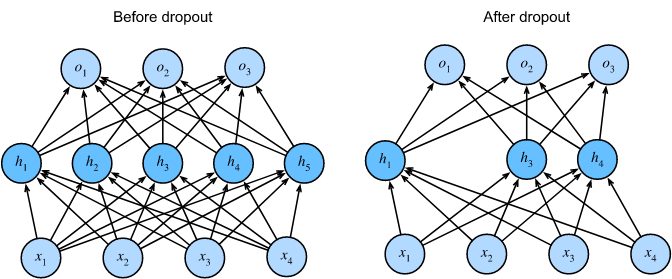

- During training, the Dropout layer randomly drops out a fraction of the neurons in the previous layer. The dropout rate specifies the fraction of input units to drop out, and typically ranges from 0.2 to 0.5.
- During inference (i.e., when making predictions on new, unseen data), the dropout layer is not used, and all neurons are used for computing the output.


- Dropout is a powerful technique for preventing overfitting in neural networks, but it can also increase training time, since each forward pass through the network involves randomly dropping out neurons. 
- It's important to experiment with different dropout rates and to use it in conjunction with other regularization techniques, such as L2 regularization, to improve the model's generalization performance.

**Which of the given options is true about model capacity? (i.e, Model capacity refers to the ability of neural networks to approximate complex functions).**

- **As number of hidden layers increases, model capacity increases**
- As dropout ratio increases, model capacity increases
- As learning rate increases, model capacity increases

The correct option is: As the number of hidden layers increases, model capacity increases.

Model capacity refers to the ability of neural networks to approximate complex functions. As the number of hidden layers increases, the model's capacity to represent complex functions also increases. This is because each additional hidden layer allows the model to learn increasingly abstract representations of the input data.

The other two options are not correct:

As dropout ratio increases, model capacity does not increase. Dropout is a regularization technique that helps prevent overfitting by randomly dropping out a fraction of the neurons in a layer during training. Increasing the dropout ratio reduces the capacity of the model to overfit the training data, but does not increase its capacity to represent complex functions.
As the learning rate increases, model capacity does not increase. The learning rate controls the step size that the optimizer takes during training, and affects the speed and stability of the learning process. It does not directly affect the capacity of the model to represent complex functions. However, choosing an appropriate learning rate is important for ensuring that the model converges to a good solution during training.


**Which of the options are correct about dropout in neural networks?**

- A. The more the dropout rate the more will be the chances for the neural network to overfit
- B. The less the dropout rate the more will be the chances for the neural network to underfit
- C. Dropout is used after training when making predictions
- D. **The value of dropout hyperparameter 0.4 implies that 40% neurons will have zero weight in the layer**

- The default interpretation of the dropout hyperparameter is the probability of a neuron to be dropped or having zero weight.

- The more the dropout rate the, more will be randomization and regularization and the lesser will be the chance for the model to overfit. Thus more dropouts will result in fewer chances of overfitting. Similarly, the fewer the dropout, the more will be the chances to overfit.

- Dropout is only used during training to make the network more robust to fluctuations in the training data. At test time, we do not apply dropout with the test data, and during inference in production.

- The number of trainable parameters in a dropout layer is always zero. 
- They are just used to enforce the output of certain neurons to zero.
- The Dropout layer is not a trainable layer. 
- It has no trainable parameters such as weight W or bias b. 
- Therefore, there is no parameters gradients to compute.

**If while training the above neural network, a dropout layer is introduced just before the second hidden layer, with a dropout rate = 0.5. Then which of the masked vectors is valid for the neurons of the second hidden layer?

**Note: The objective of a masked vector is to decide which neurons are active during calculations.

- [1,0,1,0]

Explanation:

As it is mentioned that the dropout rate is 0.5, hence we need a masked vector where the probability of 1 is 0.5. From the given options only [1,0,1,0] satisfies this condition.
Also, the number of hidden neurons is 4 in the first hidden layer.
